<a href="https://colab.research.google.com/github/jafarobeidat/webpages_vconsult/blob/main/New_York_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Chosen Topic: New York Taxi Trip Duration <br> The dataset contains information about Taxi rides in NYC and the target variable is the duration. The model has to estimate the duration of the trip based on the information provided. <br> Variables: <br>1. **ID** - a unique identifier for each trip<br>2. **Vendor ID** - a code indicating the provider associated with the trip record<br>3. **Pickup Date & Time** - date and time when the meter was engaged<br>4. **Passenger Count** - the number of passengers in the vehicle (driver entered value)<br>5. **Pickup Longitude** - the longitude where the meter was engaged<br>6. **Pickup Latitude** - the latitude where the meter was engaged<br>7. **Dropoff Longitude** - the longitude where the meter was disengaged<br>8. **Dropoff Latitude** - the latitude where the meter was disengaged<br>9. **Store and forward flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip<br> 10. **trip_duration** - duration of the trip in ***seconds***

# Loading the datasets

In [63]:
import pandas as pd

In [64]:
train_data = pd.read_csv('/content/drive/MyDrive/ML/Assignments/Assignment 2/train.csv')

In [65]:
test_data = pd.read_csv('/content/drive/MyDrive/ML/Assignments/Assignment 2/test.csv')

In [66]:
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [67]:
test_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


# Data exploration and preprocessing

## Explanatory Data Analysis  

In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [69]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [70]:
train_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [71]:
test_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'passenger_count',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'store_and_fwd_flag'],
      dtype='object')

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

<ipython-input-73-591a6b6becc6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


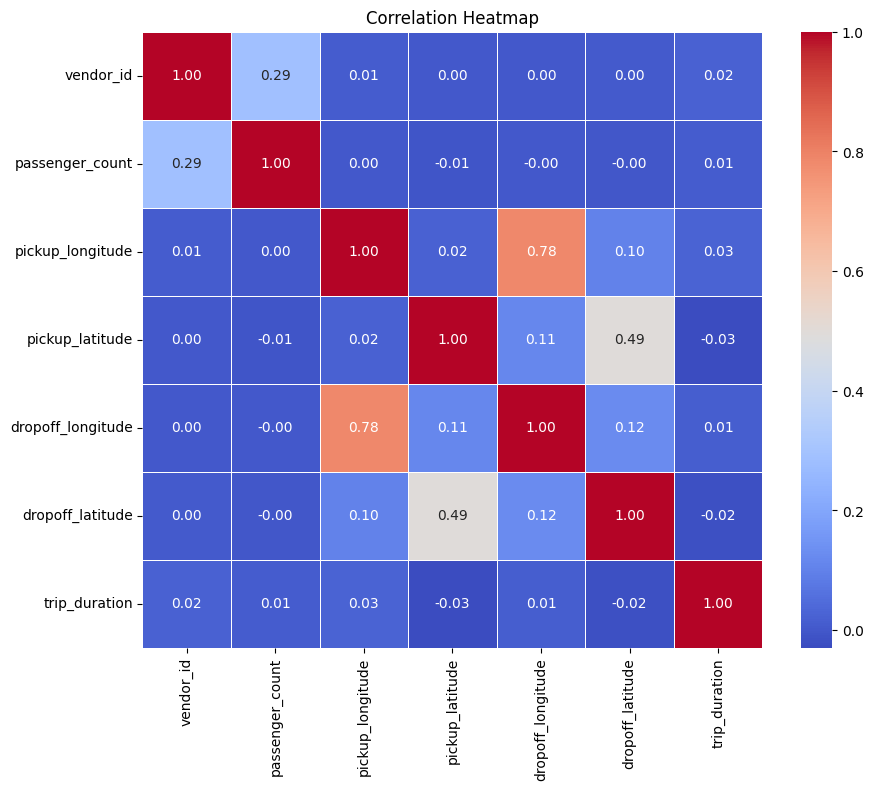

In [73]:
correlation_matrix = train_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Categoral Variables - Encoding

In [74]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [75]:
# Encoding store_and_fwd_flag in the test dataset

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(train_data[['store_and_fwd_flag']])
# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['store_and_fwd_flag']))

# Concatenate the original DataFrame with the encoded DataFrame
data_encoded = pd.concat([train_data, encoded_df], axis=1)

# Display the encoded DataFrame
train_data = data_encoded

In [76]:
# Encoding store_and_fwd_flag in the test dataset

encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(test_data[['store_and_fwd_flag']])
# Convert the encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=encoder.get_feature_names_out(['store_and_fwd_flag']))

# Concatenate the original DataFrame with the encoded DataFrame
data_encoded = pd.concat([test_data, encoded_df], axis=1)

# Display the encoded DataFrame
test_data = data_encoded

In [77]:
# Drop the original store_and_fwd_flag column
train_data = train_data.drop('store_and_fwd_flag', axis=1)
test_data = test_data.drop('store_and_fwd_flag', axis=1)


In [78]:
print(train_data['passenger_count'].value_counts())

1    1033540
2     210318
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64


In [79]:
# Encoding passenger_count in the train dataset
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(train_data[['passenger_count']])

# Convert the encoded data to a DataFrame with custom column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=['passenger_count_' + str(i) for i in range(encoded_data.shape[1])])

# Concatenate the original DataFrame with the encoded DataFrame
train_data = pd.concat([train_data, encoded_df], axis=1)

In [80]:
# Encoding passenger_count in the test dataset
encoder = OneHotEncoder()
encoded_data = encoder.fit_transform(test_data[['passenger_count']])

# Convert the encoded data to a DataFrame with custom column names
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=['passenger_count_' + str(i) for i in range(encoded_data.shape[1])])

# Concatenate the original DataFrame with the encoded DataFrame
test_data = pd.concat([test_data, encoded_df], axis=1)

In [81]:
# Drop the original passenger_count column
train_data = train_data.drop('passenger_count', axis=1)
test_data = test_data.drop('passenger_count', axis=1)

In [82]:
train_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'passenger_count_0', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'passenger_count_7',
       'passenger_count_8', 'passenger_count_9'],
      dtype='object')

The test dataset does not have the following classes: passenger_count = 8 and passenger_count = 9.<br>So, these two two classes will be dropped from the train dataset for simplicity

In [83]:
# Check the current column names in the DataFrame
print(train_data.columns)

# Drop columns only if they exist in the DataFrame
columns_to_drop = ['passenger_count_8', 'passenger_count_9']
columns_to_drop = [col for col in columns_to_drop if col in train_data.columns]
train_data = train_data.drop(columns_to_drop, axis=1)


Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'passenger_count_0', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'passenger_count_7',
       'passenger_count_8', 'passenger_count_9'],
      dtype='object')


In [84]:
train_data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'trip_duration', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'passenger_count_0', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'passenger_count_7'],
      dtype='object')

## Feature Engineering

### Distance

A new feature, "distance," will be computed using the Haversine formula. This feature will represent the distance between the pickup and dropoff points, providing a more meaningful measure than the raw geographic coordinates.







In [85]:
import numpy as np

In [86]:
def haversine_distance(lon1, lat1, lon2, lat2):

  # Convert latitude and longitude from degrees to radians
  lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

  # Haversine formula
  dlon = lon2 - lon1
  dlat = lat2 - lat1
  a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
  c = 2 * np.arcsin(np.sqrt(a))

  # Radius of the Earth in kilometers
  R = 6371.0

  # Calculate the distance
  distance = R * c
  return distance

In [87]:
# Compute distances in kilometres using Haversine formula

train_data['distance'] = haversine_distance(train_data['pickup_longitude'], train_data['pickup_latitude'], train_data['dropoff_longitude'], train_data['dropoff_latitude'])

test_data['distance'] = haversine_distance(test_data['pickup_longitude'], test_data['pickup_latitude'], test_data['dropoff_longitude'], test_data['dropoff_latitude'])



In [88]:
# Drop the coordinates columns
train_data = train_data.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)

test_data = test_data.drop(['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis=1)

### Date and Time

In [89]:
# Compute duration form timestamps and then re-do heatmap

# Convert 'pickup_datetime' and 'dropoff_datetime' to datetime objects
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])
train_data['dropoff_datetime'] = pd.to_datetime(train_data['dropoff_datetime'])

# Calculate duration of each trip
train_data['computed_duration'] = (train_data['dropoff_datetime'] - train_data['pickup_datetime']).dt.total_seconds()

<ipython-input-90-591a6b6becc6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = train_data.corr()


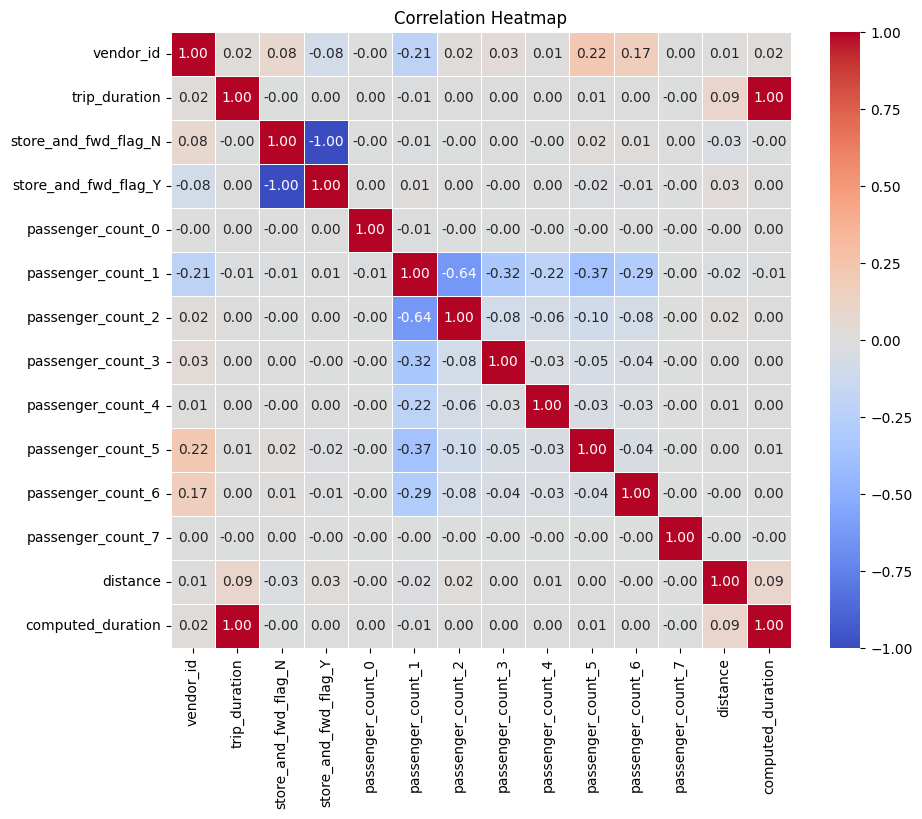

In [90]:
correlation_matrix = train_data.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Very high correlation between duration computed using the timestamps and the privided trip duration, this is expected as they're basically the same. Also, very high correlation between encoded variables but this is normal as they are binary encoded. <br>The pickup date time will be kept within the data as traffic patterns (which are affected by time of the year and hour of the day) might be good predictors for the duration of the trip


In [91]:
# Drop computed duration variable

train_data = train_data.drop('computed_duration', axis = 1)

In [92]:
import pandas as pd

In [93]:
# Convert pickup_datetime column to datetime type
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])

# Extract day of the year (1 to 365)
train_data['day'] = train_data['pickup_datetime'].dt.dayofyear

# Calculate continuous hour (0 to 24)
train_data['continuous_hour'] = train_data['pickup_datetime'].dt.hour + train_data['pickup_datetime'].dt.minute / 60


train_data.head()


,id,vendor_id,pickup_datetime,dropoff_datetime,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,distance,day,continuous_hour
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.498521,74,17.400000
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,663,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.805507,164,0.716667
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,2124,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.385098,19,11.583333
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,429,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.485498,97,19.533333
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,435,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.188588,86,13.500000


In [94]:
train_data = train_data.drop(['pickup_datetime', 'dropoff_datetime'], axis=1)

In [95]:
# Same for the test dataset

# Convert pickup_datetime column to datetime type
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'])

# Extract day of the year (1 to 365)
test_data['day'] = test_data['pickup_datetime'].dt.dayofyear

# Calculate continuous hour (0 to 24)
test_data['continuous_hour'] = test_data['pickup_datetime'].dt.hour + test_data['pickup_datetime'].dt.minute / 60

test_data.head()


,id,vendor_id,pickup_datetime,store_and_fwd_flag_N,store_and_fwd_flag_Y,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,distance,day,continuous_hour
0,id3004672,1,2016-06-30 23:59:58,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.746426,182,23.983333
1,id3505355,1,2016-06-30 23:59:53,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.759239,182,23.983333
2,id1217141,1,2016-06-30 23:59:47,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.306155,182,23.983333
3,id2150126,2,2016-06-30 23:59:41,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.269088,182,23.983333
4,id1598245,1,2016-06-30 23:59:33,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.960842,182,23.983333


In [96]:
test_data = test_data.drop(['pickup_datetime'], axis=1)

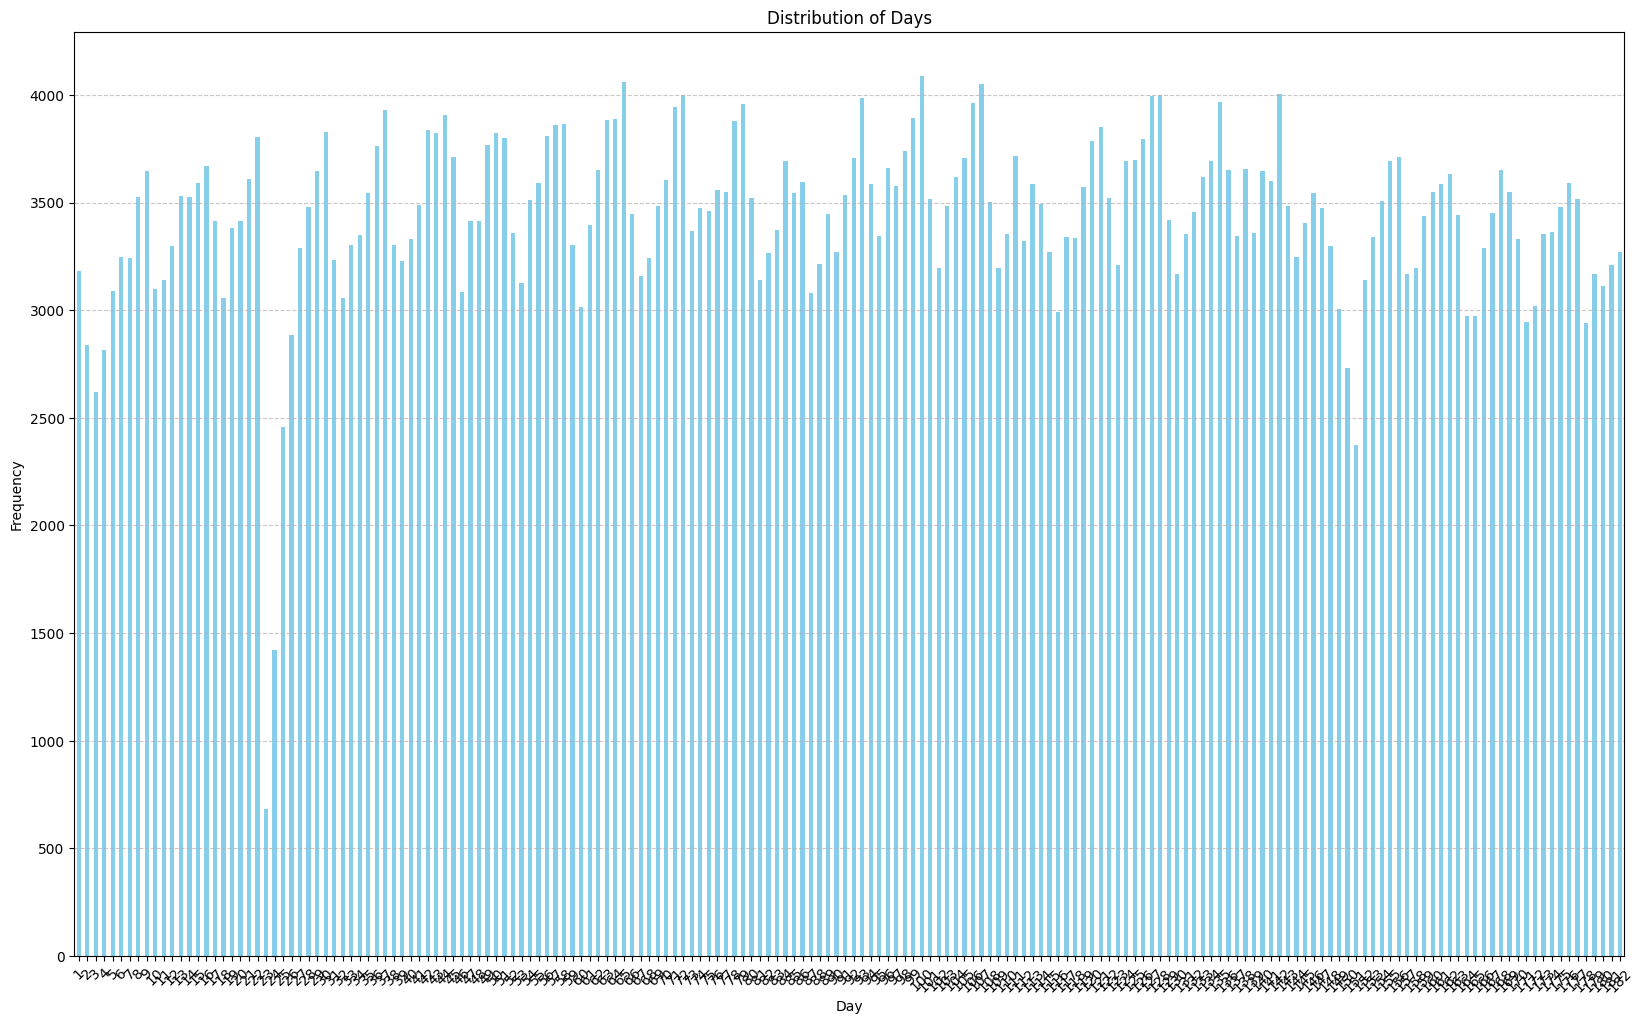

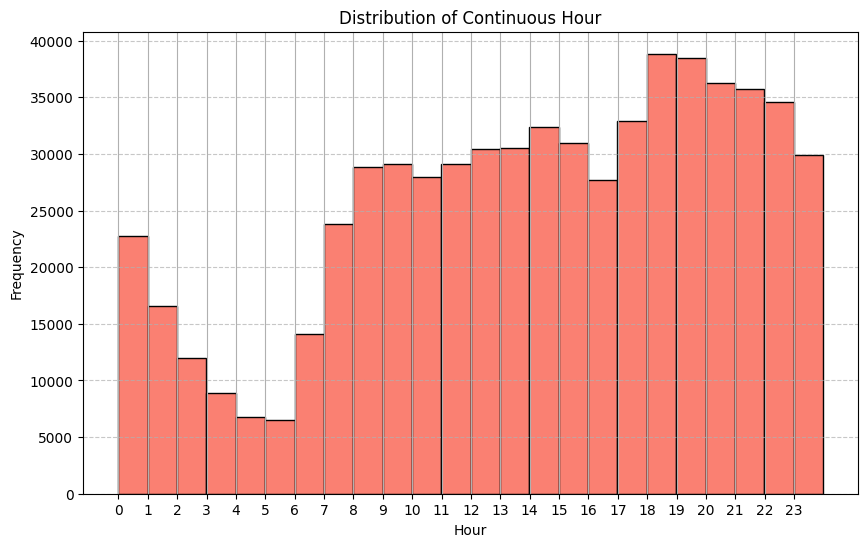

In [97]:
import matplotlib.pyplot as plt

# Plot histogram for 'day'
plt.figure(figsize=(20, 12))
test_data['day'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Distribution of Days')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Plot histogram for 'continuous_hour'
plt.figure(figsize=(10, 6))
test_data['continuous_hour'].hist(color='salmon', bins=24, edgecolor='black')
plt.title('Distribution of Continuous Hour')
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.show()


## Feauture Scaling

As a last step before developing the model, distance, day, and continous_hour have to scaled (standardized and normalized)

In [98]:
train_data.head()

,id,vendor_id,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,distance,day,continuous_hour
0,id2875421,2,455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.498521,74,17.400000
1,id2377394,1,663,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.805507,164,0.716667
2,id3858529,2,2124,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6.385098,19,11.583333
3,id3504673,2,429,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.485498,97,19.533333
4,id2181028,2,435,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.188588,86,13.500000


In [99]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [100]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Extract numerical columns
numerical_columns = ['distance', 'day', 'continuous_hour']

# Standardize using StandardScaler on numerical columns
scaler_standard = StandardScaler()
train_data[numerical_columns] = scaler_standard.fit_transform(train_data[numerical_columns])

# Normalize using MinMaxScaler on numerical columns
scaler_min_max = MinMaxScaler()
train_data[numerical_columns] = scaler_min_max.fit_transform(train_data[numerical_columns])

In [101]:
train_data.head()

,id,vendor_id,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,distance,day,continuous_hour
0,id2875421,2,455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001208,0.403315,0.725504
1,id2377394,1,663,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001455,0.900552,0.029882
2,id3858529,2,2124,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005146,0.099448,0.482974
3,id3504673,2,429,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001197,0.530387,0.814454
4,id2181028,2,435,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000958,0.469613,0.562891


In [102]:
# Check if everything is okay
train_data.isnull().sum().sum()

0

In [103]:
test_data.isnull().sum().sum()

0

In [104]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Extract numerical columns
numerical_columns = ['distance', 'day', 'continuous_hour']

# Standardize using StandardScaler on numerical columns
scaler_standard = StandardScaler()
test_data[numerical_columns] = scaler_standard.fit_transform(test_data[numerical_columns])

# Normalize using MinMaxScaler on numerical columns
scaler_min_max = MinMaxScaler()
test_data[numerical_columns] = scaler_min_max.fit_transform(test_data[numerical_columns])

In [105]:
test_data.head()

,id,vendor_id,store_and_fwd_flag_N,store_and_fwd_flag_Y,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,distance,day,continuous_hour
0,id3004672,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002651,1.0,1.0
1,id3505355,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002663,1.0,1.0
2,id1217141,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001261,1.0,1.0
3,id2150126,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005086,1.0,1.0
4,id1598245,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000927,1.0,1.0


# Model Development

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

## Linear Regression

In [107]:
train_data.columns

Index(['id', 'vendor_id', 'trip_duration', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'passenger_count_0', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'passenger_count_7',
       'distance', 'day', 'continuous_hour'],
      dtype='object')

In [125]:
# Split data into features and target variable
X = train_data[['vendor_id', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'passenger_count_0', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'passenger_count_7',
       'distance', 'day','continuous_hour']]

y = train_data['trip_duration']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Predict on the test data
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)

Linear Regression Mean Squared Error: 10316941.838660216


## Decision Tree

In [109]:
# Initialize decision tree regressor
tree_model = DecisionTreeRegressor()

# Fit the model to the training data
tree_model.fit(X_train, y_train)

# Predict on the test data
y_pred_tree = tree_model.predict(X_test)

# Calculate mean squared error
mse_tree = mean_squared_error(y_test, y_pred_tree)
print("Decision Tree Mean Squared Error:", mse_tree)

Decision Tree Mean Squared Error: 36337920.18752335


 The linear regression model has a lower MSE compared to the decision tree model.<br> A **lower MSE indicates better performance**, as it reflects how close the predicted values are to the actual values.

# Model Evaluation and Selection

Model Selected: **Linear Regession**

In [110]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression

In [111]:
train_data.head()

,id,vendor_id,trip_duration,store_and_fwd_flag_N,store_and_fwd_flag_Y,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,distance,day,continuous_hour
0,id2875421,2,455,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001208,0.403315,0.725504
1,id2377394,1,663,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001455,0.900552,0.029882
2,id3858529,2,2124,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005146,0.099448,0.482974
3,id3504673,2,429,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001197,0.530387,0.814454
4,id2181028,2,435,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000958,0.469613,0.562891


In [112]:
# CROSS VALIDATION
X = train_data[['vendor_id', 'store_and_fwd_flag_N',
       'store_and_fwd_flag_Y', 'passenger_count_0', 'passenger_count_1',
       'passenger_count_2', 'passenger_count_3', 'passenger_count_4',
       'passenger_count_5', 'passenger_count_6', 'passenger_count_7',
       'distance', 'day','continuous_hour']]

y = train_data['trip_duration']

# Define number of folds for cross-validation
k_folds = 5

# Initialize KFold object
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')

# Convert negative MSE scores to positive and calculate RMSE
cv_rmse_scores = np.sqrt(-cv_scores)

# Print RMSE scores for each fold
print("Cross-Validation RMSE Scores:", cv_rmse_scores)

# Calculate average RMSE across all folds
avg_rmse = np.mean(cv_rmse_scores)
print("Average RMSE:", avg_rmse)

Cross-Validation RMSE Scores: [3211.99965843 2947.42862235 5239.43633434 3217.72912901 8892.28374332]
Average RMSE: 4701.775497491218


In [113]:
mse = mean_squared_error(y_test, y_pred)
print("Linear Regression Mean Squared Error:", mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

Linear Regression Mean Squared Error: 10316941.838660216
Root Mean Squared Error (RMSE): 3211.99966355232


In [114]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 464.84824739880486


In [115]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared (R2):", r2)

R-squared (R2): 0.025953918191641168


In [116]:
from sklearn.metrics import median_absolute_error

medae = median_absolute_error(y_test, y_pred)
print("Median Absolute Error (MedAE):", medae)

Median Absolute Error (MedAE): 298.3523434654843


# Estimating trip Duration for Test Data

In [117]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [118]:
# Remove the 'id' column from the test data
test_data_without_id = test_data.drop('id', axis=1)

# Use the model to make predictions on the test data
predicted_trip_duration = model.predict(test_data_without_id)

# Print the predicted trip durations
print(predicted_trip_duration)


[ 918.70739533  920.44558012  723.3250301  ... 1478.65572739 3114.49337191
 1372.21048443]


In [119]:
# Add the predicted trip durations to the test_data DataFrame
test_data_with_predictions = test_data.assign(trip_duration=predicted_trip_duration)
test_data = test_data_with_predictions
# Print the updated DataFrame
test_data.head()

,id,vendor_id,store_and_fwd_flag_N,store_and_fwd_flag_Y,passenger_count_0,passenger_count_1,passenger_count_2,passenger_count_3,passenger_count_4,passenger_count_5,passenger_count_6,passenger_count_7,distance,day,continuous_hour,trip_duration
0,id3004672,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002651,1.0,1.0,918.707395
1,id3505355,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002663,1.0,1.0,920.445580
2,id1217141,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001261,1.0,1.0,723.325030
3,id2150126,2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005086,1.0,1.0,1455.937663
4,id1598245,1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000927,1.0,1.0,676.480924


## Preparing submission file

In [120]:
# Specify the path where you want to save the file in your Google Drive
file_path = '/content/drive/MyDrive/ML/Assignments/Assignment 2'


In [121]:
'''
# Select the 'id' and 'trip_duration' columns from the test_data DataFrame
submission = test_data[['id', 'trip_duration']]

# Save the submission DataFrame to the specified file path in your Google Drive
submission.to_csv(file_path, index=False)
'''

"\n# Select the 'id' and 'trip_duration' columns from the test_data DataFrame\nsubmission = test_data[['id', 'trip_duration']]\n\n# Save the submission DataFrame to the specified file path in your Google Drive\nsubmission.to_csv(file_path, index=False)\n"